In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

Read theinput file

In [3]:
sms =pd.read_csv('../input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Remove Unnamed columns and rename existing ones

In [4]:
sms = sms[['v1','v2']]
sms.rename(columns={'v1':'label','v2':'message'},inplace=True)
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Let's add another column of message length

In [5]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb197723d68>,
      dtype=object)

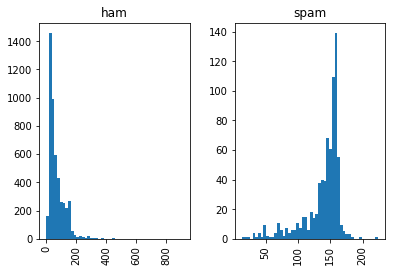

In [6]:
sms.hist(column='length',by='label',bins=50)

Interesting to see, more longer the message is, more likely that it is spam.

**PreProcessing and Vectorization**

Create a copy of the message and write function to process it

In [7]:
text = sms['message'].copy()

def pre_process(text):
    # Remove Punctuations
    text = text.translate(str.maketrans('','',string.punctuation))
    # Remove Stopwords 
    text = [word for word in text.split()if word.lower() not in stopwords.words('english')]
    return ' '.join(text)

text_cleaned = text.apply(pre_process)

# Tfidf Vectorizer
vectorizer = TfidfVectorizer('english')
features = vectorizer.fit_transform(text_cleaned)
print(features)

  (0, 8871)	0.19696340342726038
  (0, 1168)	0.3454453072521403
  (0, 3821)	0.16228382867264401
  (0, 2198)	0.2918335915067389
  (0, 1862)	0.3297648855969494
  (0, 4809)	0.2918335915067389
  (0, 9107)	0.23822187576133733
  (0, 3861)	0.19227005405586492
  (0, 1864)	0.2918335915067389
  (0, 1401)	0.2626832171423389
  (0, 2482)	0.26752361109476797
  (0, 6381)	0.2701917502132373
  (0, 4652)	0.3454453072521403
  (0, 3764)	0.15705625796538664
  (1, 5978)	0.5462557824449175
  (1, 9003)	0.4313385731102942
  (1, 4620)	0.5233273701797004
  (1, 4848)	0.4080505634471753
  (1, 5946)	0.2741803362458879
  (2, 71)	0.23298968636017275
  (2, 1254)	0.16831155329741232
  (2, 6721)	0.23298968636017275
  (2, 8521)	0.1252035413992088
  (2, 6669)	0.23298968636017275
  (2, 6777)	0.1658630343061897
  :	:
  (5568, 3169)	0.6457639024659789
  (5568, 3543)	0.5628210076825846
  (5568, 3783)	0.3636095248537397
  (5568, 4156)	0.3660732290385455
  (5569, 7922)	0.520467167163554
  (5569, 7547)	0.520467167163554
  (5569, 

**Classification**

In [8]:
# Split into Train and Test

features_train, features_test, labels_train, labels_test = train_test_split(features,sms['label'],test_size=0.3,random_state=111)

# Import various classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

Use Parameters as defined in this notebook: [Spam Detection Classifiers](https://www.kaggle.com/muzzzdy/spam-detection-classifiers-hyperparameter-tuning)

In [9]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

# Make Dictionary to iterate through the classifiers
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

Functions to Train and predict based on the classifiers


In [10]:
def train_predict_classifier(classifier, feature_train, labels_train, features_test):
    classifier.fit(feature_train,labels_train)
    return classifier.predict(features_test)


Now run all classiefiers in dictionary

In [11]:
predicted_scores=[]
for i,classifier in clfs.items():
    predicted = train_predict_classifier(classifier,features_train,labels_train,features_test)
    predicted_scores.append((i,[accuracy_score(labels_test,predicted)]))
    
df = pd.DataFrame.from_items(predicted_scores,orient='index',columns=['Score'])
df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,Score
SVC,0.978469
KN,0.924641
NB,0.984450
DT,0.958732
LR,0.943182
RF,0.970096
AdaBoost,0.967105
BgC,0.967105
ETC,0.977273


Text(0.5, 1.0, 'Classifier Distribution')

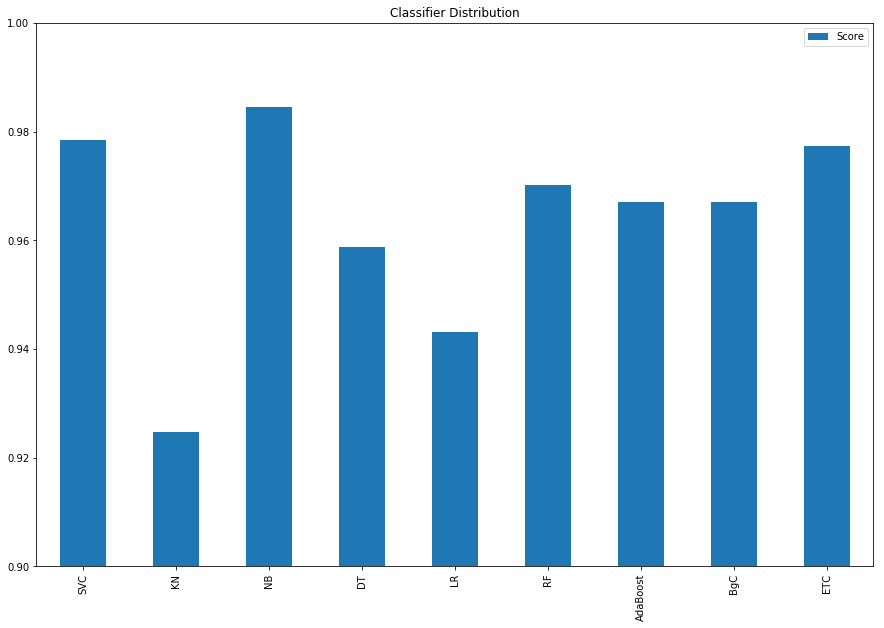

In [12]:
df.plot(kind='bar',ylim=(0.9,1.0),figsize=(15,10),align='center')
plt.title('Classifier Distribution')

Naive Bayes seems to have preformed better than others

**Stemming**

Let's try and run the classifiers on stemmed words

In [13]:
def stemmer(text):
    text = text.split()
    words=''
    for word in text:
        stemmer = SnowballStemmer('english')
        words+=(stemmer.stem(word))+' '
    return words

text_cleaned = text_cleaned.apply(stemmer)
features = vectorizer.fit_transform(text_cleaned)

features_train, features_test, labels_train, labels_test = train_test_split(features,sms['label'],test_size=0.3,random_state=111)

predicted_scores=[]
for i,classifier in clfs.items():
    predicted = train_predict_classifier(classifier,features_train,labels_train,features_test)
    predicted_scores.append((i,[accuracy_score(labels_test,predicted)]))
    
df1 = pd.DataFrame.from_items(predicted_scores,orient='index',columns=['Score after Stemming'])
df = pd.concat([df,df1],axis=1)
df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,Score,Score after Stemming
SVC,0.978469,0.978469
KN,0.924641,0.927632
NB,0.984450,0.985048
DT,0.958732,0.959928
LR,0.943182,0.946770
RF,0.970096,0.974880
AdaBoost,0.967105,0.970096
BgC,0.967105,0.968900
ETC,0.977273,0.977871


Text(0.5, 1.0, 'Classifier Distribution')

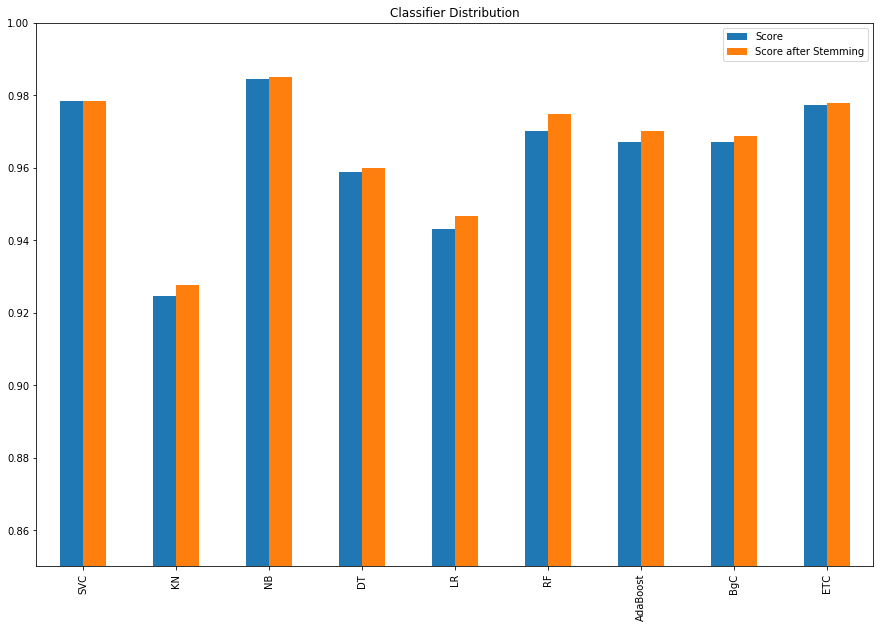

In [14]:
df.plot(kind='bar',ylim=(0.85,1.0),figsize=(15,10),align='center')
plt.title('Classifier Distribution')

**Include Message Length**

In [15]:
lf = sms['length'].as_matrix()
newfeature = np.hstack((features.todense(),lf[:, None]))

features_train, features_test, labels_train, labels_test = train_test_split(newfeature,sms['label'],test_size=0.3,random_state=111)

predicted_scores=[]
for i,classifier in clfs.items():
    predicted = train_predict_classifier(classifier,features_train,labels_train,features_test)
    predicted_scores.append((i,[accuracy_score(labels_test,predicted)]))

df2 = pd.DataFrame.from_items(predicted_scores,orient='index',columns=['Score after Stemming with Length'])
df = pd.concat([df,df2],axis=1)
df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  # This is added back by InteractiveShellApp.init_path()


,Score,Score after Stemming,Score after Stemming with Length
SVC,0.978469,0.978469,0.861244
KN,0.924641,0.927632,0.881579
NB,0.984450,0.985048,0.982656
DT,0.958732,0.959928,0.957536
LR,0.943182,0.946770,0.954545
RF,0.970096,0.974880,0.975478
AdaBoost,0.967105,0.970096,0.961722
BgC,0.967105,0.968900,0.962321
ETC,0.977273,0.977871,0.975478


Text(0.5, 1.0, 'Distribution by Classifier')

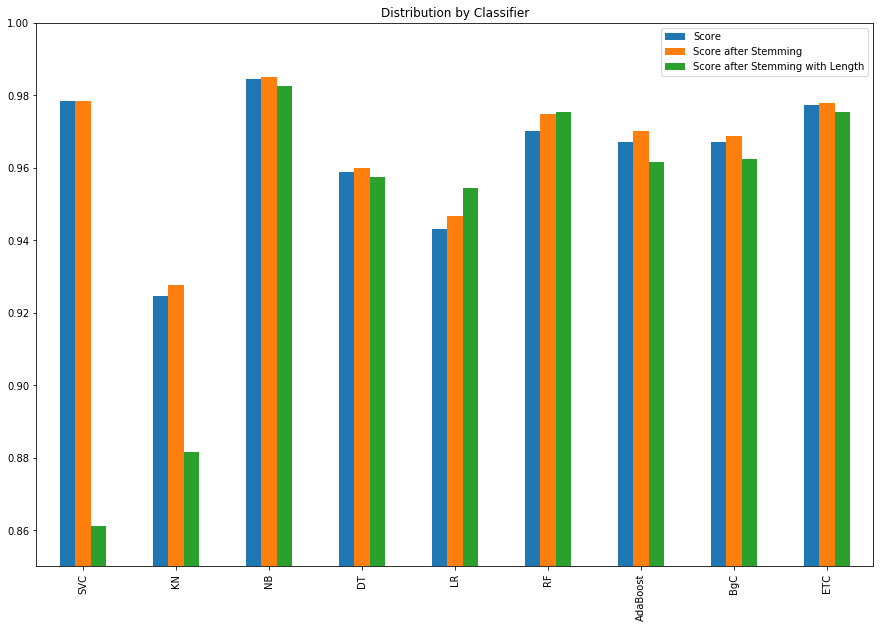

In [16]:
df.plot(kind='bar',ylim=(0.85,1.0),figsize=(15,10),align='center')
plt.title('Distribution by Classifier')

**Voting Classifier**

In [17]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')
eclf.fit(features_train,labels_train)
pred = eclf.predict(features_test)
print(accuracy_score(labels_test,pred))

0.979066985645933


Seems like **Naive Bayes** performed the best!!